# **Banking Marketing Campaign**

## *Business Insight*

#### Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

## *Description of the problem*

#### The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

#### To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [9]:
# Import the libraries
import pandas as pd

### **Step 1:** Loading the dataset

In [10]:
# Load the dataset
bank_marketing_campaign_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ';')
bank_marketing_campaign_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### **Step 2:** Exploratory Data Analyis

In [11]:
# information of the dataset
bank_marketing_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

DataFrame information:
- The dataframe has 41188 rows and 21 columns
- Aparently there is not missing information
- There are 10 numerical variables (datatype: int and float) and 11 categorical variables

In [12]:
# Find the colums with unique values
bank_marketing_campaign_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [13]:
# Find the colums with null values
bank_marketing_campaign_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Repeated and null values:
- There is not null values on the dataframe
- None of the colums have unique values, so we cannot drop them

In [14]:
# Describe the dataframe
bank_marketing_campaign_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

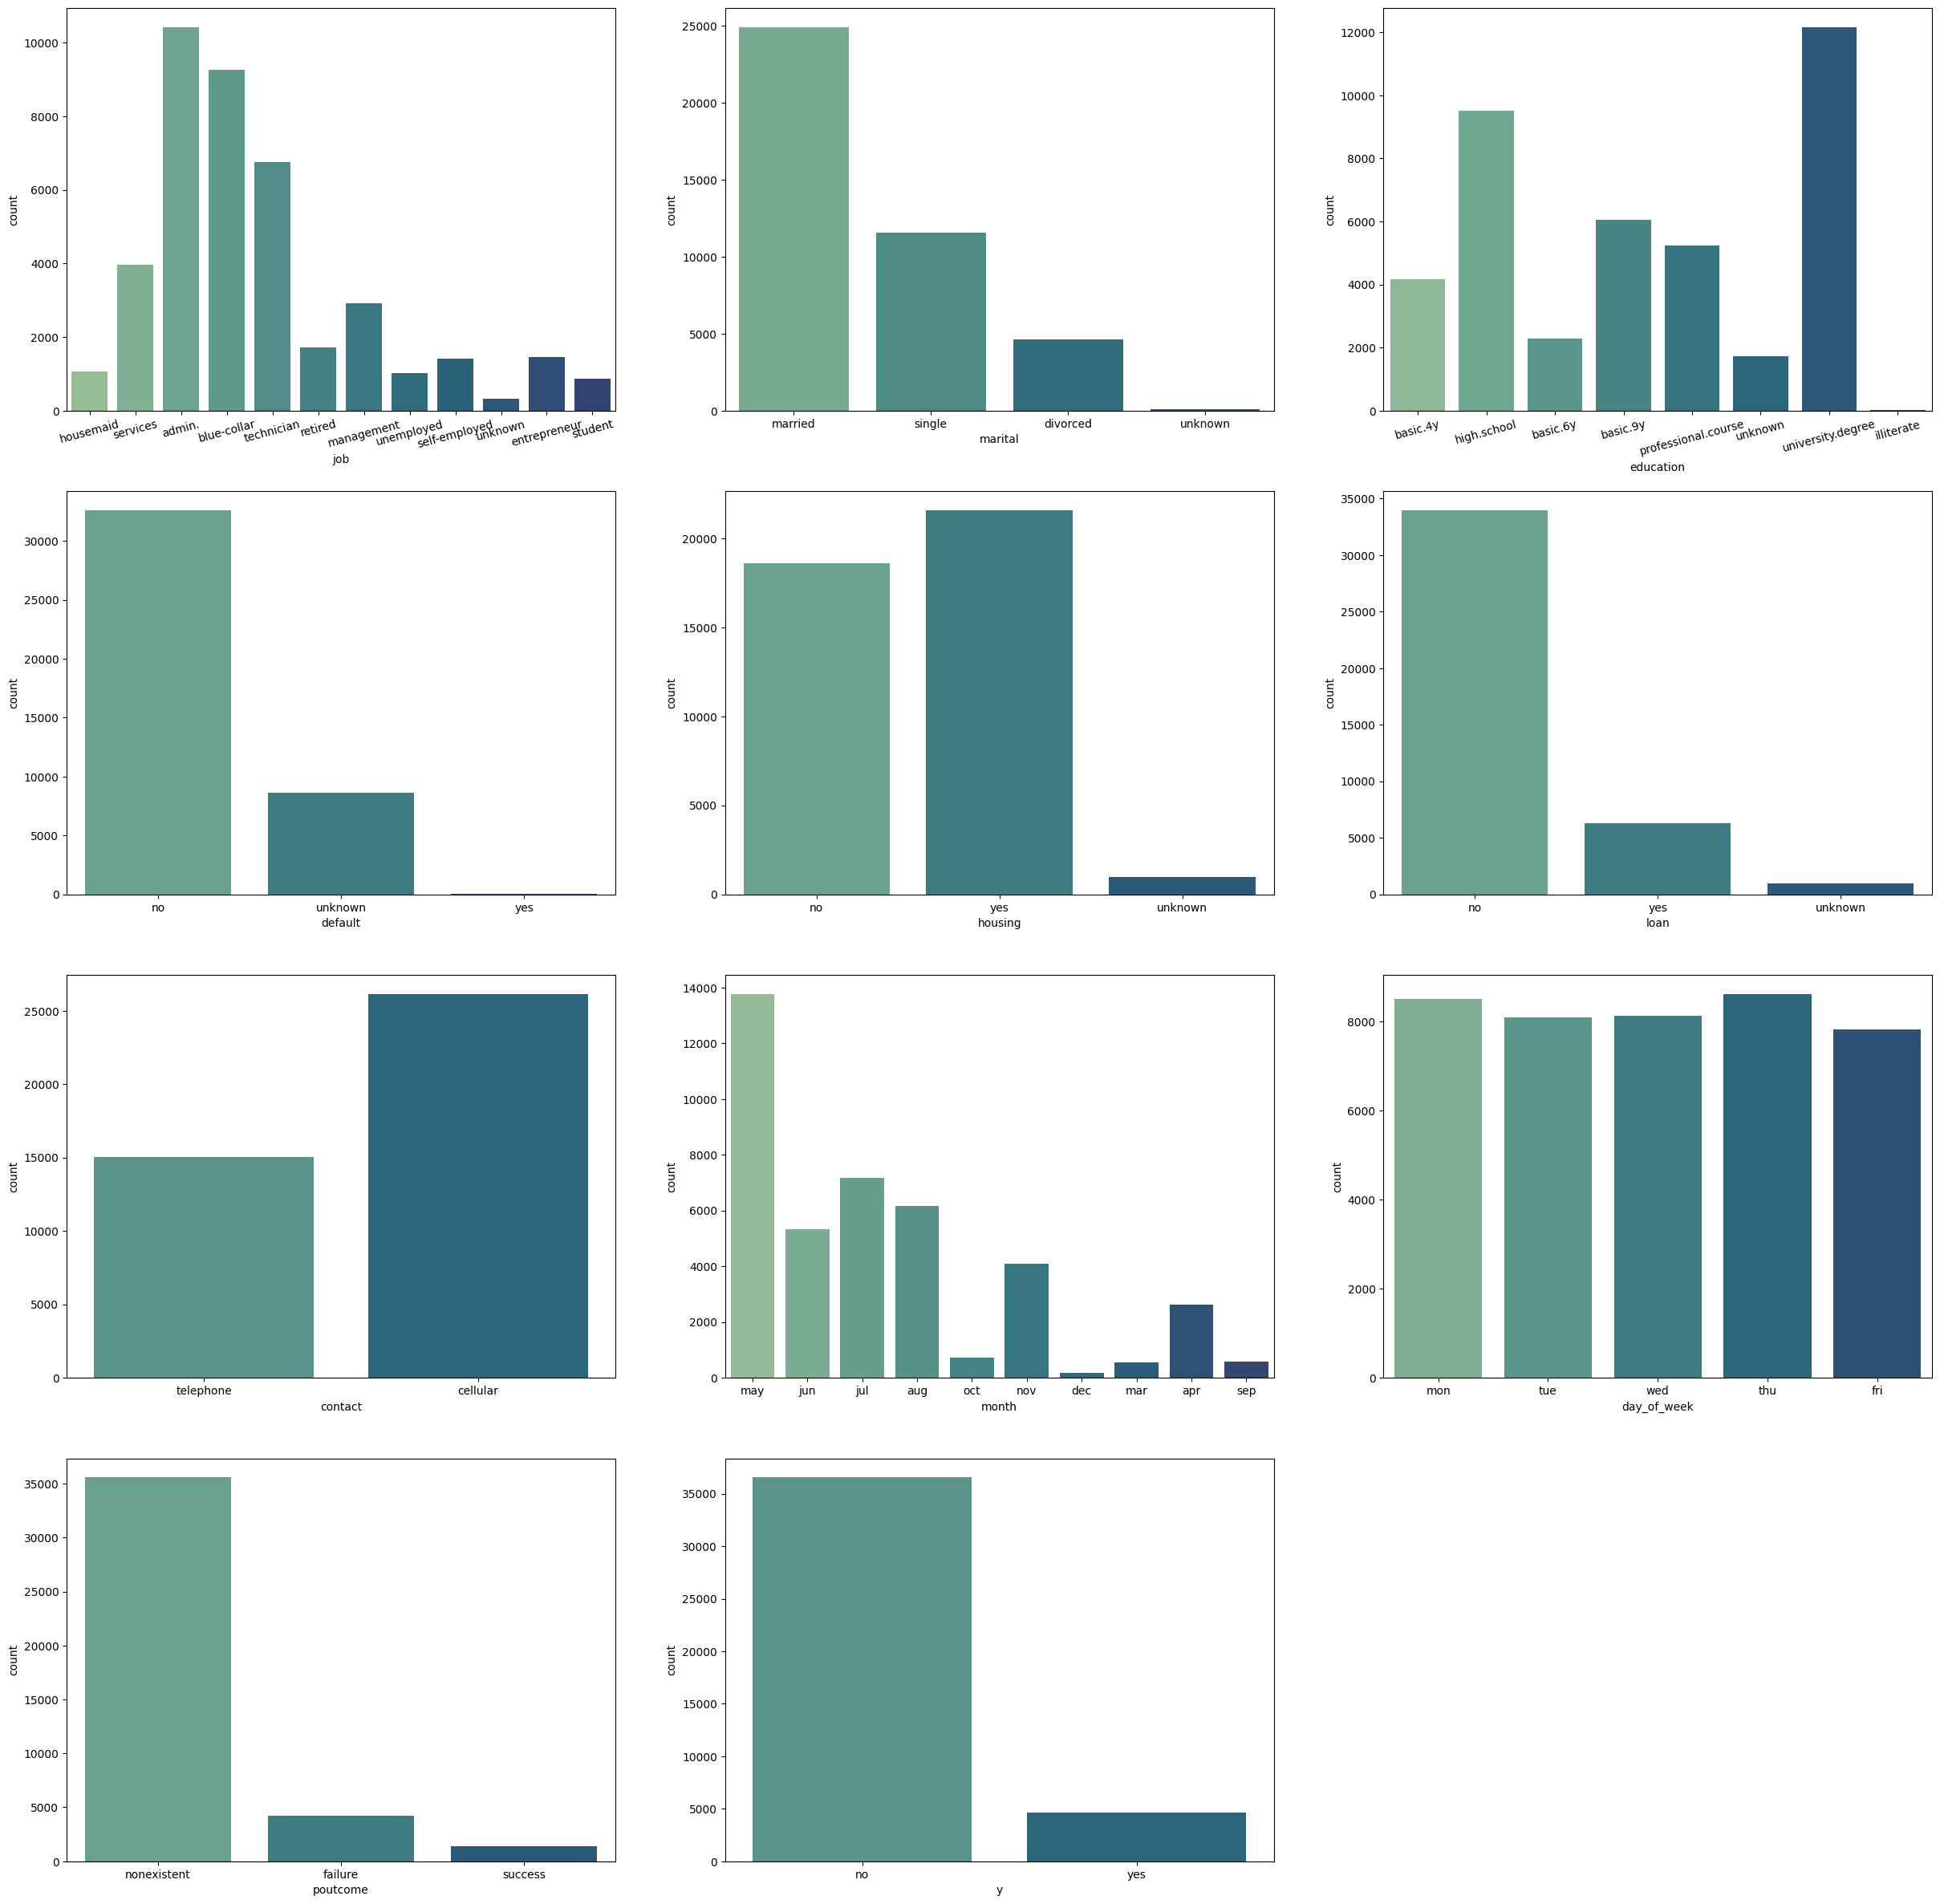

In [32]:
# Visualize the categorical variables with a countplot
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 3, figsize=(30, 30))

# Countplot of the job column
sns.countplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'job', palette="crest")
# Rotate x-axis labels
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=15)
# Countplot of the marital column
sns.countplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'marital', palette="crest")
# Countplot of the education column
sns.countplot(ax = ax[0,2], data = bank_marketing_campaign_df, x = 'education', palette="crest")
# Rotate x-axis labels
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=15)
# Countplot of the default column
sns.countplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'default', palette="crest")
# Countplot of the housing column
sns.countplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'housing', palette="crest")
# Countplot of the loan column
sns.countplot(ax = ax[1,2], data = bank_marketing_campaign_df, x = 'loan', palette="crest")
# Countplot of the contact column
sns.countplot(ax = ax[2,0], data = bank_marketing_campaign_df, x = 'contact', palette="crest")
# Countplot of the month column
sns.countplot(ax = ax[2,1], data = bank_marketing_campaign_df, x = 'month', palette="crest")
# Countplot of the day_of_week column
sns.countplot(ax = ax[2,2], data = bank_marketing_campaign_df, x = 'day_of_week', palette="crest")
# Countplot of the poutcome column
sns.countplot(ax = ax[3,0], data = bank_marketing_campaign_df, x = 'poutcome', palette="crest")
# Countplot of the y column
sns.countplot(ax = ax[3,1], data = bank_marketing_campaign_df, x = 'y', palette="crest")
# Remove the empty subplots
fig.delaxes(ax[3,2])

# Display the plot
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

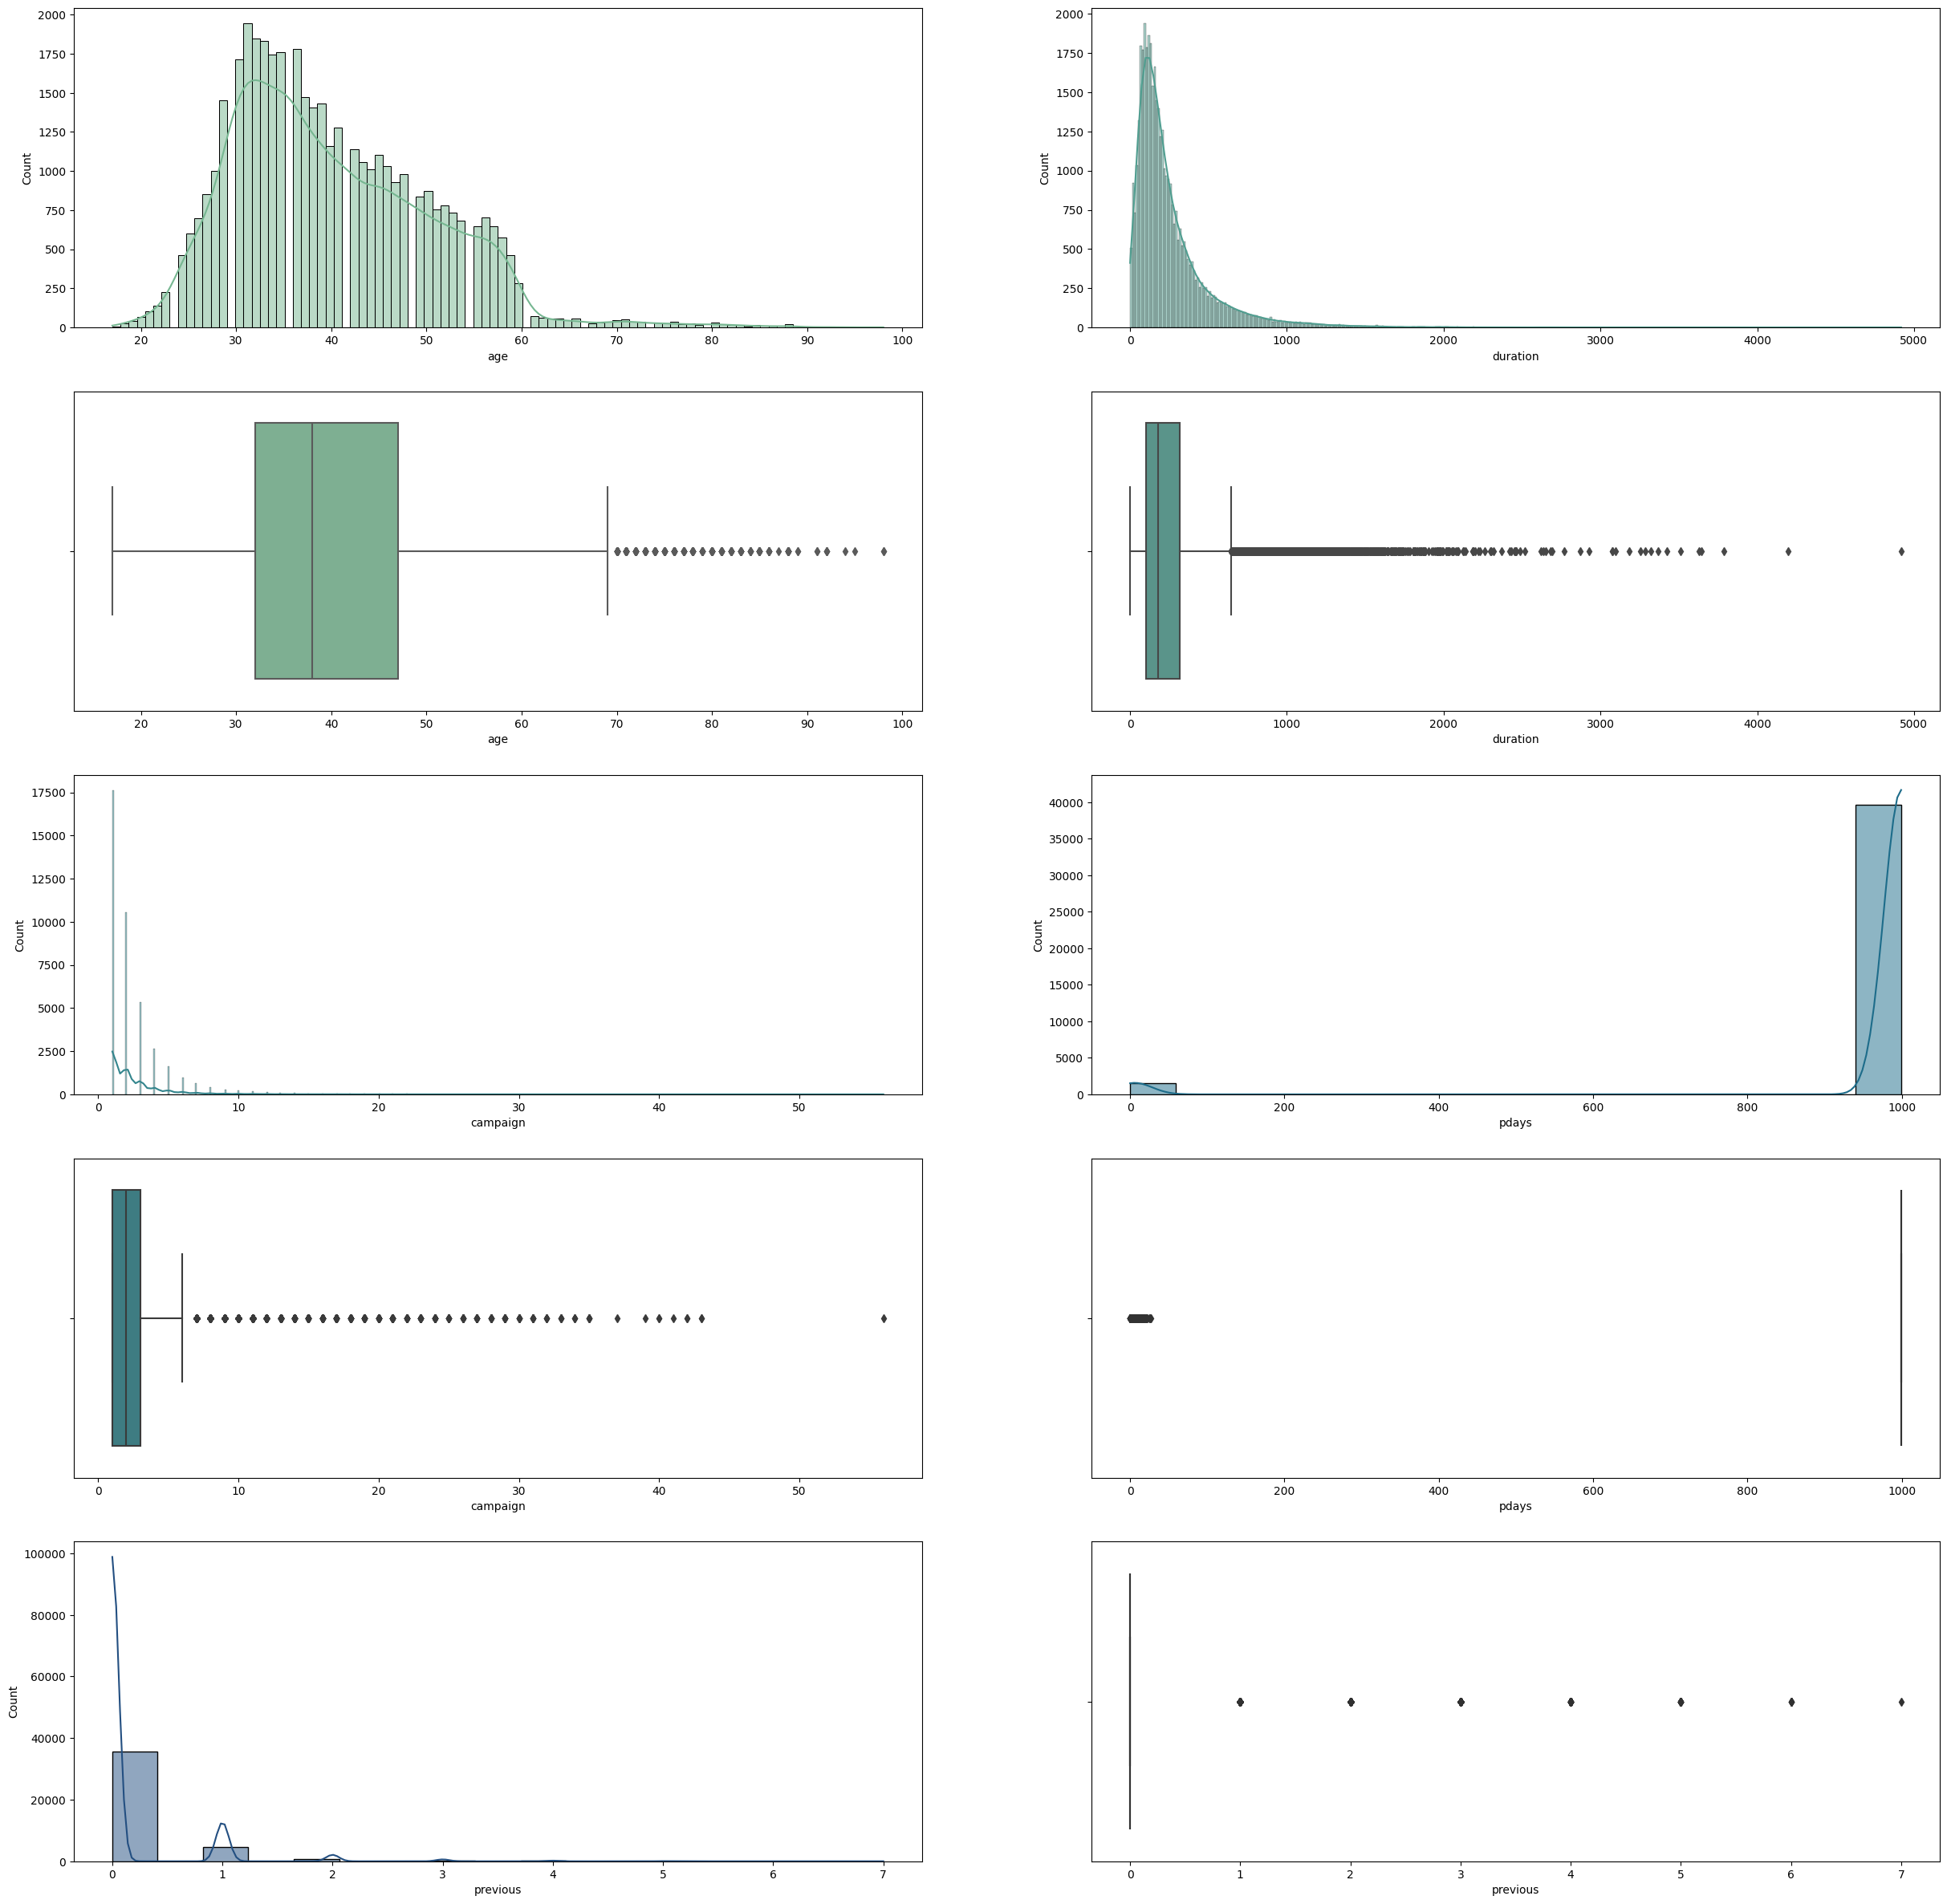

In [34]:
# Visualize the numerical variables with a histogram and boxplot
fig, ax = plt.subplots(5, 2, figsize=(30, 30))

# set the colors
palette = sns.color_palette("crest", 5)

# Histogram of the age column
sns.histplot(ax = ax[0,0], data = bank_marketing_campaign_df, x = 'age', kde=True, color = palette[0])
# Boxplot of the age column
sns.boxplot(ax = ax[1,0], data = bank_marketing_campaign_df, x = 'age', color = palette[0])
# Histogram of the duration column
sns.histplot(ax = ax[0,1], data = bank_marketing_campaign_df, x = 'duration', kde=True, color = palette[1])
# Boxplot of the duration column
sns.boxplot(ax = ax[1,1], data = bank_marketing_campaign_df, x = 'duration', color = palette[1])
# Histogram of the campaign column
sns.histplot(ax = ax[2,0], data = bank_marketing_campaign_df, x = 'campaign', kde=True, color = palette[2])
# Boxplot of the campaign column
sns.boxplot(ax = ax[3,0], data = bank_marketing_campaign_df, x = 'campaign', color = palette[2])
# Histogram of the pdays column
sns.histplot(ax = ax[2,1], data = bank_marketing_campaign_df, x = 'pdays', kde=True, color = palette[3])
# Boxplot of the pdays column
sns.boxplot(ax = ax[3,1], data = bank_marketing_campaign_df, x = 'pdays', color = palette[3])
# Histogram of the previous column
sns.histplot(ax = ax[4,0], data = bank_marketing_campaign_df, x = 'previous', kde=True, color = palette[4])
# Boxplot of the previous column
sns.boxplot(ax = ax[4,1], data = bank_marketing_campaign_df, x = 'previous', color = palette[4])

# Display the plot
plt.show()

